In [93]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt




In [95]:
credit_data = pd.read_csv(r"D:\Resume projects\credit_risk_dataset.csv")



In [37]:
credit_data.head(20)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [39]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [69]:
credit_data['person_emp_length'].fillna(credit_data['person_emp_length'].median(), inplace=True)
credit_data['loan_int_rate'].fillna(credit_data['loan_int_rate'].median(), inplace=True)

C:\Users\chaud\AppData\Local\Temp\ipykernel_40848\2492353392.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_data['person_emp_length'].fillna(credit_data['person_emp_length'].median(), inplace=True)
C:\Users\chaud\AppData\Local\Temp\ipykernel_40848\2492353392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

In [75]:
credit_data_encoded = pd.get_dummies(credit_data, drop_first=True)

In [77]:
print(credit_data_encoded)

       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0              22          59000              123.0      35000          16.02   
1              21           9600                5.0       1000          11.14   
2              25           9600                1.0       5500          12.87   
3              23          65500                4.0      35000          15.23   
4              24          54400                8.0      35000          14.27   
...           ...            ...                ...        ...            ...   
32576          57          53000                1.0       5800          13.16   
32577          54         120000                4.0      17625           7.49   
32578          65          76000                3.0      35000          10.99   
32579          56         150000                5.0      15000          11.48   
32580          66          42000                2.0       6475           9.99   

       loan_status  loan_pe

In [79]:

X = credit_data_encoded.drop("loan_status", axis=1)
y = credit_data_encoded["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


log_pred = log_reg.predict(X_test)
log_proba = log_reg.predict_proba(X_test)[:, 1]


print("🔹 Logistic Regression Report")
print(classification_report(y_test, log_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_pred))
print("ROC AUC Score:", roc_auc_score(y_test, log_proba))

🔹 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6369
           1       0.77      0.57      0.65      1777

    accuracy                           0.87      8146
   macro avg       0.83      0.76      0.79      8146
weighted avg       0.86      0.87      0.86      8146

Confusion Matrix:
 [[6059  310]
 [ 763 1014]]
ROC AUC Score: 0.8708333565270651


In [87]:


# Initialize and fit
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

# Predict
tree_pred = tree_clf.predict(X_test)
tree_proba = tree_clf.predict_proba(X_test)[:, 1]

# Evaluate
print("\n🔹 Decision Tree Report")
print(classification_report(y_test, tree_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_pred))
print("ROC AUC Score:", roc_auc_score(y_test, tree_proba))


🔹 Decision Tree Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6369
           1       0.98      0.58      0.73      1777

    accuracy                           0.91      8146
   macro avg       0.94      0.79      0.83      8146
weighted avg       0.91      0.91      0.90      8146

Confusion Matrix:
 [[6348   21]
 [ 752 1025]]
ROC AUC Score: 0.8780853958745906


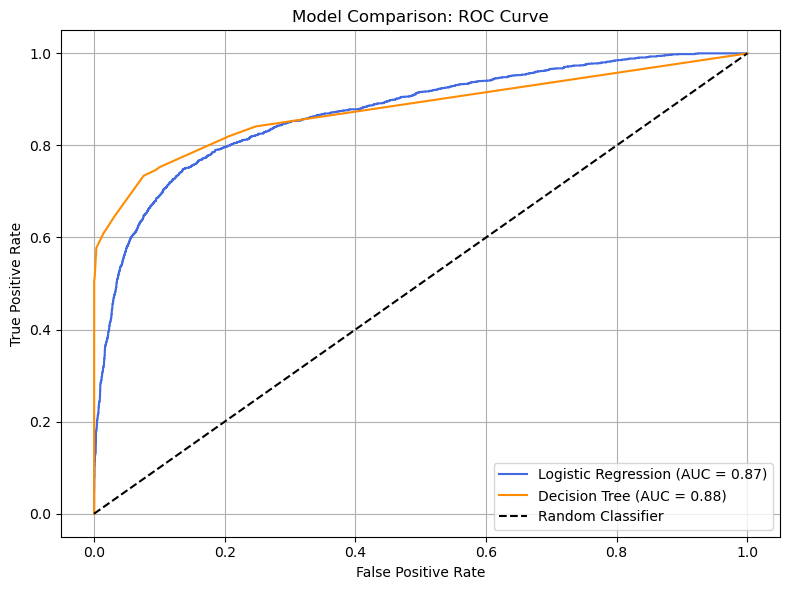

In [91]:



log_fpr, log_tpr, _ = roc_curve(y_test, log_proba)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_proba)

# Compute AUC
log_auc = auc(log_fpr, log_tpr)
tree_auc = auc(tree_fpr, tree_tpr)

# Plot
plt.figure(figsize=(8,6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})', color='royalblue')
plt.plot(tree_fpr, tree_tpr, label=f'Decision Tree (AUC = {tree_auc:.2f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--', label='Random Classifier')

plt.title('Model Comparison: ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

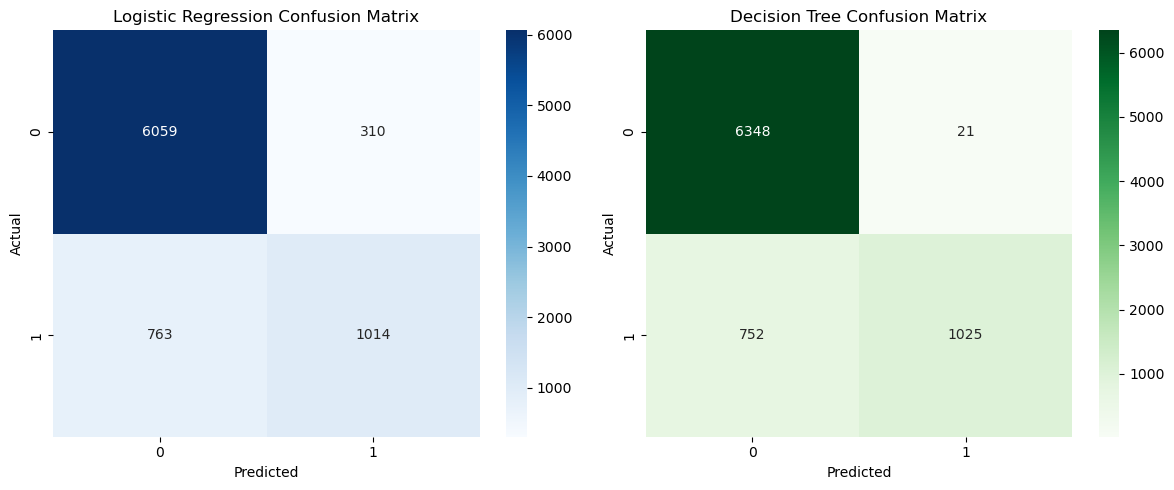

In [97]:

cm_lr = confusion_matrix(y_test, log_pred)
cm_tree = confusion_matrix(y_test, tree_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()